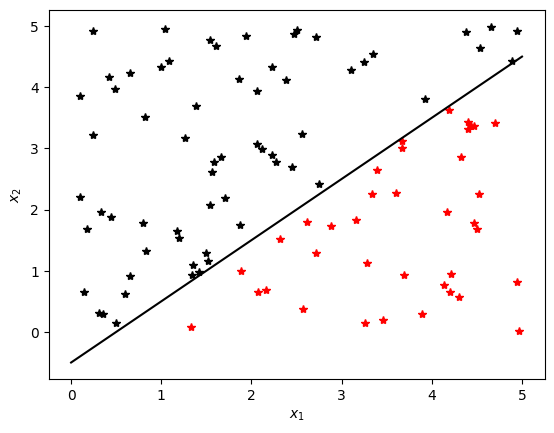

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def d_f(x1, x2, weights, w0):
    xs = np.array([[x1],[x2]])
    return np.dot(weights.T, xs) + w0

weights = np.array([[-1], [1]])
w0 = 0.5

num_points = 100
x1s = []
x2s = []

for i in range(num_points):
    x1 = np.random.uniform(0,5)
    x2 = np.random.uniform(0,5)
    x1s.append(x1)
    x2s.append(x2)
    if d_f(x1, x2, weights, w0) >= 0:
        plt.plot(x1,x2, "k*")
    else:
        plt.plot(x1,x2, "r*")
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")
#For decision line
x1_vals = np.linspace(0, 5, 100)
x2_vals = x1_vals - 0.5
plt.plot(x1_vals, x2_vals, "k")

In [56]:
#Covariance Matrix
C = np.cov(x1s,x2s)
C

array([[2.15894009, 0.13948966],
       [0.13948966, 2.30639607]])

In [64]:
points = np.column_stack((x1s, x2s))  

points_mean = np.mean(points, axis = 0)
points_std = np.std(points, axis = 0)

standard_points = (points - points_mean) / points_std


#Cov matrix of standardized points

C1 = np.cov(standard_points, rowvar=False)
C1

array([[1.01010101, 0.06314218],
       [0.06314218, 1.01010101]])

In [67]:
C1_inv_sqrt = np.linalg.inv(np.sqrt(C1))

In [74]:
mahalanobis_points = np.dot(standard_points, C1_inv_sqrt.T)

Text(0, 0.5, '$x_{2}$')

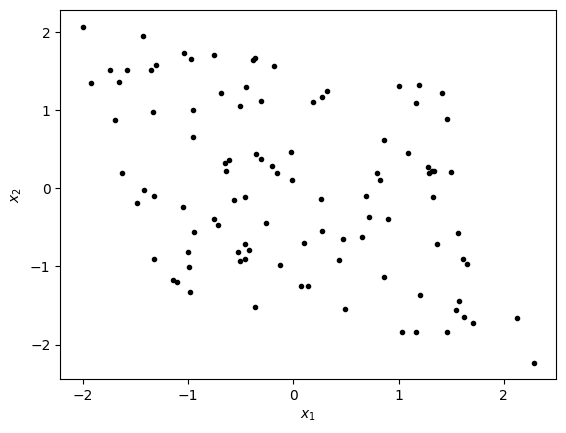

In [78]:
x1 = mahalanobis_points[:,0]
x2 = mahalanobis_points[:,1]
plt.plot(x1,x2, "k.")
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")

In [80]:
#Covariance matrix
C

array([[2.15894009, 0.13948966],
       [0.13948966, 2.30639607]])

In [87]:
eig = np.linalg.eig(C)
eigenvalues = eig[0]
eigenvectors = eig[1]
print(eigenvalues)
print(eigenvectors)

[2.07489235 2.39044381]
[[-0.85653258 -0.51609295]
 [ 0.51609295 -0.85653258]]


In [90]:
"""
If we drop the first variable with the smallest
eigenvalue associated we keep the following variability
"""

kept_variance = (eigenvalues[1]**2)/(eigenvalues[0]**2+eigenvalues[1]**2)
kept_variance #57%

0.5703157546239854